In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

C:\Users\Raisina Chowdhury\anaconda3\envs\myenv\Lib\site-packages\ecmwflibs\__init__.py:81: UserWarning: DLL load failed while importing _ecmwflibs: The specified procedure could not be found.
  warnings.warn(str(e))
C:\Users\Raisina Chowdhury\anaconda3\envs\myenv\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


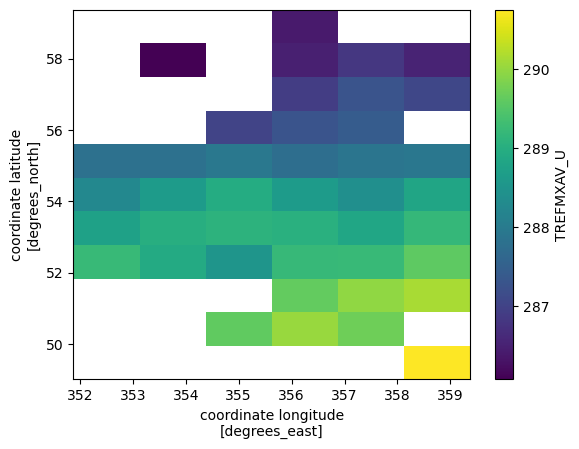

In [5]:
import xarray as xr
ds = xr.open_dataset("D:/Earth and Environ Data Sci/003_2006_2080_352_360.nc")
ds["TREFMXAV_U"].mean(dim=["time"]).plot()

In [6]:
#converting to dataframe
df1 = ds[["TREFMXAV_U","FLNS", "FSNS", "PRECT", "PRSN", "QBOT","UBOT", "VBOT"]].to_dataframe().reset_index().dropna()

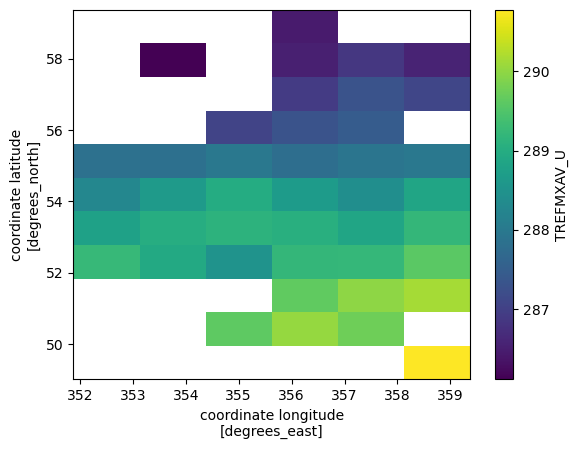

In [7]:
ds1 = xr.open_dataset("D:/Earth and Environ Data Sci/004_2006_2080_352_360.nc")
ds1["TREFMXAV_U"].mean(dim=["time"]).plot()
df2 = ds1[["TREFMXAV_U","FLNS", "FSNS", "PRECT", "PRSN", "QBOT","UBOT", "VBOT"]].to_dataframe().reset_index().dropna()

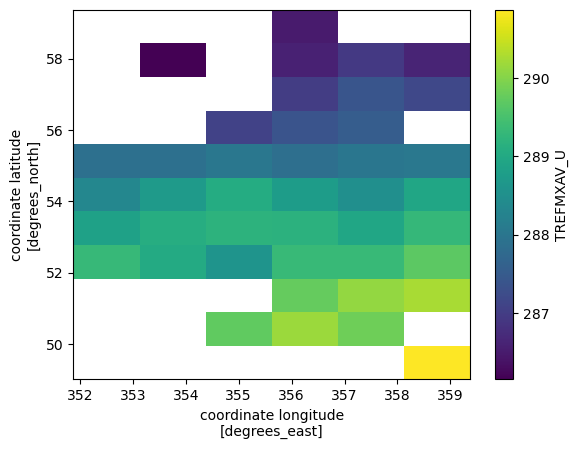

In [8]:
ds2 = xr.open_dataset("D:/Earth and Environ Data Sci/005_2006_2080_352_360.nc")
ds2["TREFMXAV_U"].mean(dim=["time"]).plot()
df3 = ds2[["TREFMXAV_U","FLNS", "FSNS", "PRECT", "PRSN", "QBOT","UBOT", "VBOT"]].to_dataframe().reset_index().dropna()

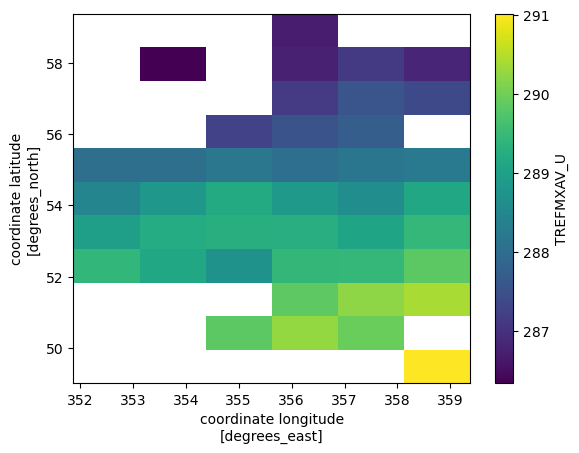

In [9]:
ds3 = xr.open_dataset("D:/Earth and Environ Data Sci/006_2006_2080_352_360.nc")
ds3["TREFMXAV_U"].mean(dim=["time"]).plot()
df4 = ds3[["TREFMXAV_U","FLNS", "FSNS", "PRECT", "PRSN", "QBOT","UBOT", "VBOT"]].to_dataframe().reset_index().dropna()

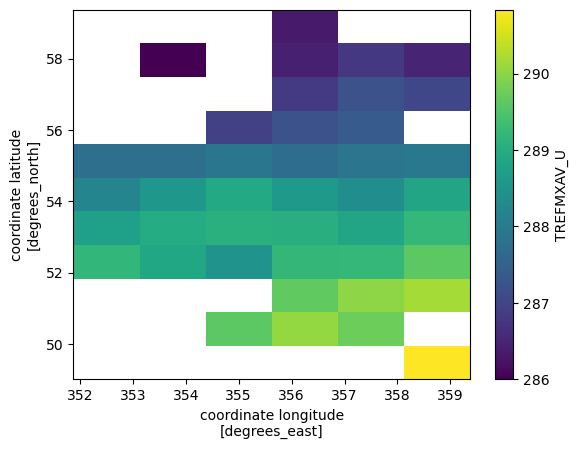

In [10]:
ds4 = xr.open_dataset("D:/Earth and Environ Data Sci/007_2006_2080_352_360.nc")
ds4["TREFMXAV_U"].mean(dim=["time"]).plot()
df5 = ds4[["TREFMXAV_U","FLNS", "FSNS", "PRECT", "PRSN", "QBOT","UBOT", "VBOT"]].to_dataframe().reset_index().dropna()

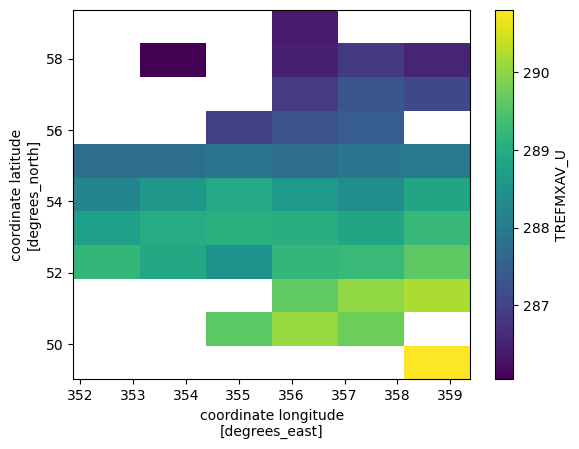

In [11]:
ds5 = xr.open_dataset("D:/Earth and Environ Data Sci/008_2006_2080_352_360.nc")
ds5["TREFMXAV_U"].mean(dim=["time"]).plot()
df6 = ds5[["TREFMXAV_U","FLNS", "FSNS", "PRECT", "PRSN", "QBOT","UBOT", "VBOT"]].to_dataframe().reset_index().dropna()

In [12]:
#merging the 6 files
df = pd.concat([df1, df2, df3, df4, df5, df6])
df = df.reset_index(drop=True)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lat,6898248.0,5.414382e+01,3.121539e+00,4.947644e+01,5.230367e+01,5.418848e+01,5.607330e+01,5.890052e+01
lon,6898248.0,3.561588e+02,2.190630e+00,3.525000e+02,3.550000e+02,3.562500e+02,3.575000e+02,3.587500e+02
TREFMXAV_U,6898248.0,2.884508e+02,1.591454e+01,2.703844e+02,2.846086e+02,2.879450e+02,2.922193e+02,3.174879e+02
FLNS,6898248.0,4.626557e+01,2.316357e+01,-1.765885e+01,2.771684e+01,4.403596e+01,6.267914e+01,1.438709e+02
FSNS,6898248.0,1.046506e+02,8.287916e+01,9.181602e-01,3.176800e+01,8.302608e+01,1.628959e+02,3.505055e+02
PRECT,6898248.0,3.793204e-08,5.615841e-08,-1.414752e-21,2.352448e-09,1.453906e-08,5.170096e-08,1.405693e-06
PRSN,6898248.0,2.999428e-10,4.705077e-09,-2.261695e-20,0.000000e+00,1.236554e-21,1.983231e-16,6.725354e-07
QBOT,6898248.0,6.654044e-03,2.099250e-03,1.392265e-03,4.995116e-03,6.360643e-03,8.076633e-03,1.943778e-02
UBOT,6898248.0,1.670478e+00,4.068017e+00,-2.683332e+01,-1.106306e+00,1.839553e+00,4.237957e+00,2.799695e+01
VBOT,6898248.0,1.696814e+00,4.079286e+00,-2.404115e+01,-1.168856e+00,1.806440e+00,4.448951e+00,2.346321e+01


In [14]:
#Checking missing values
df.isnull().any()

time          False
lat           False
lon           False
TREFMXAV_U    False
FLNS          False
FSNS          False
PRECT         False
PRSN          False
QBOT          False
UBOT          False
VBOT          False
dtype: bool

In [15]:
#checking the lat and lon values in df
unique_lat_values = df['lat'].unique()
print(unique_lat_values)
unique_lon_values = df['lon'].unique()
print(unique_lon_values)


[49.47644  50.41885  51.361256 52.303665 53.246075 54.18848  55.13089
 56.0733   57.015705 57.958115 58.900524]
[358.75 355.   356.25 357.5  352.5  353.75]


Filtering: Manchester

In [16]:
#filtering manchester using lat and lon
manchester = df[(df['lat'] > 53) & (df['lat'] < 54) & (df['lon']>357) & (df['lon'] <358)]

In [17]:
#checking for duplicates
manchester.duplicated().any()

False

In [18]:
#changing the time to datetime format
manchester['time'] = manchester['time'].astype(str)
manchester['time'] = pd.to_datetime(manchester['time'], format='%Y-%m-%d %H:%M:%S')

C:\Users\Raisina Chowdhury\AppData\Local\Temp\ipykernel_18508\3701626143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manchester['time'] = manchester['time'].astype(str)
C:\Users\Raisina Chowdhury\AppData\Local\Temp\ipykernel_18508\3701626143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manchester['time'] = pd.to_datetime(manchester['time'], format='%Y-%m-%d %H:%M:%S')


In [34]:
#Replacing negative values with 0
manchester.loc[manchester['PRECT'] < 0, 'PRECT'] = 0
manchester.loc[manchester['PRSN'] < 0, 'PRSN'] = 0

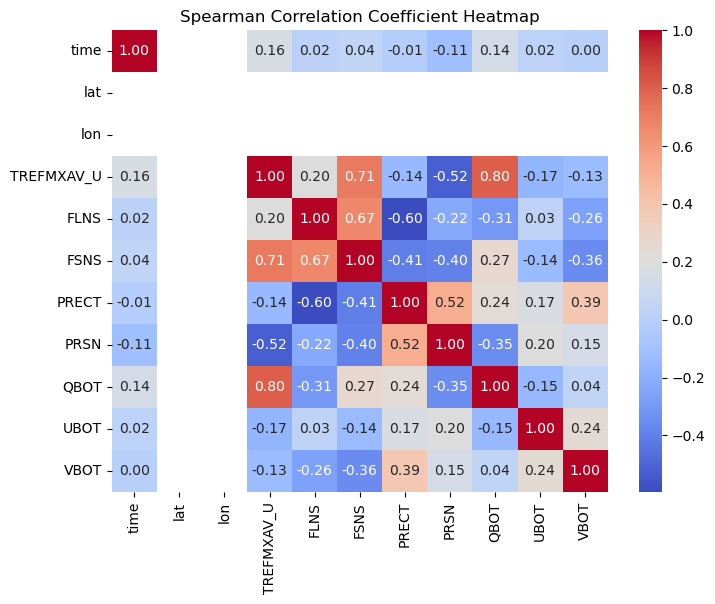

In [24]:
#spearman correlation
correlation_matrix2 = manchester.corr(method='spearman')
plt.figure(figsize=(8, 6))
#heatmap
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Coefficient Heatmap')
plt.show()

Creating Test and Training sets

In [19]:
#creating the train and test dataframes
train_data = manchester[~((manchester['time'] >= '2050-01-01') & (manchester['time'] <= '2080-12-31'))]
test_data = manchester[(manchester['time'] >= '2050-01-01') & (manchester['time'] <= '2080-12-31')]

Base Model, Model 1: All variables excluding time, reference height temp

In [20]:
#X: features, y: target variable
# train_test_split to split the train data into training and testing set
X_1 = train_data.drop(columns=['TREFMXAV_U', 'time'])
y_1 = train_data['TREFMXAV_U']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=42)
#training the Random Forest Model on training set
rf_model1.fit(X_train1, y_train1)
#Predicting on test set of the train data
y_pred1 = rf_model1.predict(X_test1)

#Evaluating mse and r-square on the testing set of the train data 
mse1 = mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error:", mse1)
r_squared1 = rf_model1.score(X_test1, y_test1)
print("R^2 Score:", r_squared1)

#Predictions on test data 
X_testdf_1 = test_data.drop(columns=['TREFMXAV_U', 'time'])
y_testdf_1 = test_data['TREFMXAV_U']
predictions_testdf_1 = rf_model1.predict(X_testdf_1)
mse_testdf_1 =  mean_squared_error(y_testdf_1, predictions_testdf_1)
print("Mean Squared Error:", mse_testdf_1)
r_squared_testdf_1 = rf_model1.score(X_testdf_1, y_testdf_1)
print("R^2 Score:", r_squared_testdf_1)


Mean Squared Error: 1.2062900028846923
R^2 Score: 0.9520806655378622
Mean Squared Error: 1.585715340106021
R^2 Score: 0.945731572510122


Feature Importance from Base Model

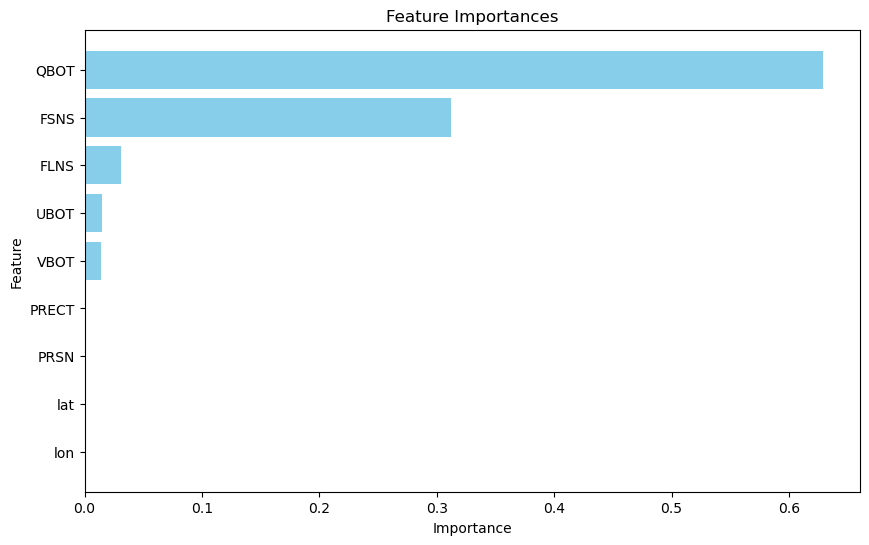

In [21]:
#using model 1 to calculate the importance values
feature_importances1 = rf_model1.feature_importances_

columns = ['lat', 'lon', 'FLNS', 'FSNS', 'PRECT','PRSN', 'QBOT', 'UBOT', 'VBOT']
#df to display feature importances
feature_importance_df1 = pd.DataFrame({'Feature': columns, 'Importance': feature_importances1})
# descending order
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

#plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df1['Feature'], feature_importance_df1['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

Model Based on EDA from Project 1, Model 2:

In [22]:
#X: features, y: target variable
# train_test_split to split the train data into training and testing set
X_2 = train_data.drop(columns=['TREFMXAV_U', 'time', 'FLNS', 'UBOT', 'VBOT'])
y_2 = train_data['TREFMXAV_U']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)

#training the Random Forest Model on training set
rf_model2.fit(X_train2, y_train2)

#Predicting on test set of the train data
y_pred2 = rf_model2.predict(X_test2)

# Evaluate the model using Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)
r_squared2 = rf_model2.score(X_test2, y_test2)
print("R^2 Score:", r_squared2)

#Predictions on test data 
X_testdf_2 = test_data.drop(columns=['TREFMXAV_U', 'time', 'FLNS', 'UBOT', 'VBOT'])
y_testdf_2 = test_data['TREFMXAV_U']
predictions_testdf_2 = rf_model2.predict(X_testdf_2)
mse_testdf_2 =  mean_squared_error(y_testdf_2, predictions_testdf_2)
print("Mean Squared Error:", mse_testdf_2)
r_squared_testdf_2 = rf_model2.score(X_testdf_2, y_testdf_2)
print("R^2 Score:", r_squared_testdf_2)


Mean Squared Error: 2.1533032776023604
R^2 Score: 0.9144609839167271
Mean Squared Error: 2.634085615690254
R^2 Score: 0.909852871683981


Model 3: Removing PRECT and PRSN

In [23]:
#X: features, y: target variable
# train_test_split to split the train data into training and testing set
X_3 = train_data.drop(columns=['TREFMXAV_U','time', 'PRECT', 'PRSN', 'lat', 'lon'])
y_3 = train_data['TREFMXAV_U']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=42)

#training the Random Forest Model on training set
rf_model3.fit(X_train3, y_train3)

#Predicting on test set of the train data
y_pred3 = rf_model3.predict(X_test3)

# Evaluate the model using Mean Squared Error (MSE)
mse3 = mean_squared_error(y_test3, y_pred3)
print("Mean Squared Error:", mse3)
r_squared3 = rf_model3.score(X_test3, y_test3)
print("R^2 Score:", r_squared3)

#Predictions on test data 
X_testdf_3 = test_data.drop(columns=['TREFMXAV_U', 'time', 'PRECT', 'PRSN', 'lat', 'lon'])
y_testdf_3 = test_data['TREFMXAV_U']
predictions_testdf_3 = rf_model3.predict(X_testdf_3)
mse_testdf_3 =  mean_squared_error(y_testdf_3, predictions_testdf_3)
print("Mean Squared Error:", mse_testdf_3)
r_squared_testdf_3 = rf_model3.score(X_testdf_3, y_testdf_3)
print("R^2 Score:", r_squared_testdf_3)

Mean Squared Error: 1.2066864263115182
R^2 Score: 0.9520649177933453
Mean Squared Error: 1.5874768481078947
R^2 Score: 0.9456712878758912


Adding Seasonality: Feature Engineering

In [25]:
df_mcr = manchester.copy()

#year
df_mcr['year'] = manchester['time'].dt.year
#month
df_mcr['month'] = manchester['time'].dt.month
#week, isocalendar is used for standardization and consistency
df_mcr['week'] = manchester['time'].dt.isocalendar().week
#day
df_mcr['day'] = manchester['time'].dt.day
#hour
df_mcr['hour'] = manchester['time'].dt.hour
#min
df_mcr['min'] = manchester['time'].dt.minute
#second
df_mcr['sec'] = manchester['time'].dt.second

#mapping Dec,Jan,Feb as winter, March,April, May as Spring, June,July,Aug as Summer and September, Oct and Nov as Fall
season = df_mcr['month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
#converting the categorical variables into numerical variables
season_to_numerical = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}

df_mcr['season_enc'] = season.map(season_to_numerical)

In [26]:
columns_to_drop = [ 'lat', 'lon', 'year', 'month', 'week', 'day', 'hour', 'min', 'sec']
df_mcr.drop(columns=columns_to_drop, inplace=True)

In [27]:
df_mcr_test_data = df_mcr[(df_mcr['time'] >= '2050-01-01') & (df_mcr['time'] <= '2080-12-31')]
df_mcr_train_data = df_mcr[~((df_mcr['time'] >= '2050-01-01') & (df_mcr['time'] <= '2080-12-31'))]

Model 4: Random Forest Model

In [28]:
#X: features, y: target variable
# train_test_split to split the train data into training and testing set
X_4 = df_mcr_train_data.drop(columns=['TREFMXAV_U', 'time'])
y_4 = df_mcr_train_data['TREFMXAV_U']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
rf_model4 = RandomForestRegressor(n_estimators=100, random_state=42)

#training the Random Forest Model on training set
rf_model4.fit(X_train4, y_train4)

#Predicting on test set of the train data
y_pred4 = rf_model4.predict(X_test4)

# Evaluate the model using Mean Squared Error (MSE)
mse4 = mean_squared_error(y_test4, y_pred4)
print("Mean Squared Error:", mse4)
r_squared4 = rf_model4.score(X_test4, y_test4)
print("R^2 Score:", r_squared4)

#Predictions on test data 
X_testdf_4 = df_mcr_test_data.drop(columns=['TREFMXAV_U', 'time'])
y_testdf_4 = df_mcr_test_data['TREFMXAV_U']
predictions_testdf_4 = rf_model4.predict(X_testdf_4)
mse_testdf_4 =  mean_squared_error(y_testdf_4, predictions_testdf_4)
print("Mean Squared Error:", mse_testdf_4)
r_squared_testdf_4 = rf_model4.score(X_testdf_4, y_testdf_4)
print("R^2 Score:", r_squared_testdf_4)

Mean Squared Error: 1.130914072185306
R^2 Score: 0.9550749408986305
Mean Squared Error: 1.5432574028864339
R^2 Score: 0.947184623653095


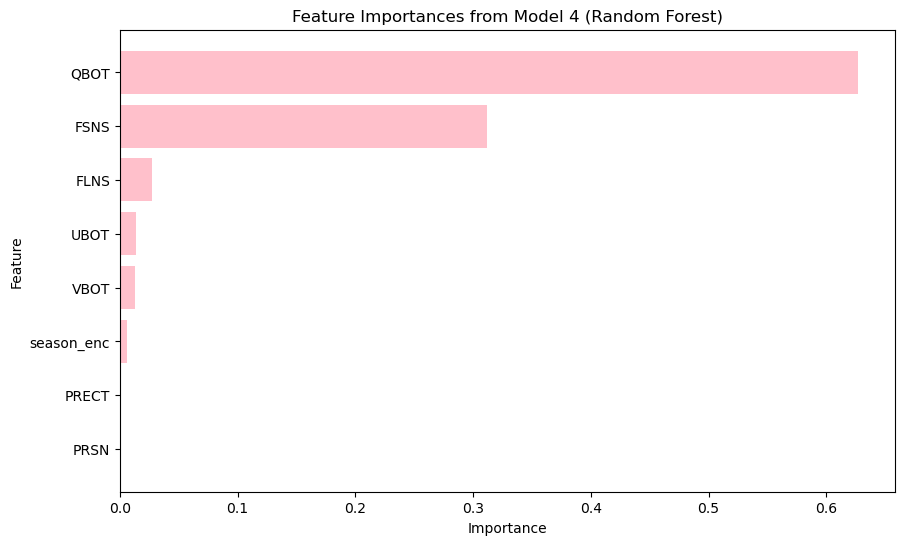

In [29]:
#Feature Importance for Model 4
feature_importances4_rf = rf_model4.feature_importances_
columns = [ 'FLNS', 'FSNS', 'PRECT','PRSN', 'QBOT', 'UBOT', 'VBOT', 'season_enc']
#df
feature_importance_df4_rf = pd.DataFrame({'Feature': columns, 'Importance': feature_importances4_rf})
#sorting in descending order
feature_importance_df4_rf = feature_importance_df4_rf.sort_values(by='Importance', ascending=False)
#plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df4_rf['Feature'], feature_importance_df4_rf['Importance'], color='pink')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Model 4 (Random Forest)')
#most imp features at the top
plt.gca().invert_yaxis() 
plt.show()

Model 5: XGBoost Model using the data frames from model 4

In [30]:
# Instantiate the XGBoost model
xgb_model4 = XGBRegressor(n_estimators=100, random_state=42)

# #training the XGBoost on training set
xgb_model4.fit(X_train4, y_train4)

#Predicting on test set of the train data
y_pred_xgb4 = xgb_model4.predict(X_test4)

# Evaluate the model using Mean Squared Error (MSE)
mse_xgb4 = mean_squared_error(y_test4, y_pred_xgb4)
print("XGBoost Mean Squared Error:", mse_xgb4)
r_squared_xgb4 = xgb_model4.score(X_test4, y_test4)
print("XGBoost R^2 Score:", r_squared_xgb4)

# Make predictions on the test data of df_mcr_test_data
X_testdf_4 = df_mcr_test_data.drop(columns=['TREFMXAV_U', 'time'])
y_testdf_4 = df_mcr_test_data['TREFMXAV_U']
predictions_testdf_xgb4 = xgb_model4.predict(X_testdf_4)
mse_testdf_xgb4 = mean_squared_error(y_testdf_4, predictions_testdf_xgb4)
print("XGBoost Mean Squared Error (Test Data):", mse_testdf_xgb4)
r_squared_testdf_xgb4 = xgb_model4.score(X_testdf_4, y_testdf_4)
print("XGBoost R^2 Score (Test Data):", r_squared_testdf_xgb4)

XGBoost Mean Squared Error: 0.8883965
XGBoost R^2 Score: 0.9647088418295434
XGBoost Mean Squared Error (Test Data): 1.2568976
XGBoost R^2 Score (Test Data): 0.9569848046707387


Visualisation of Predicted Vs Actual Temp for both models

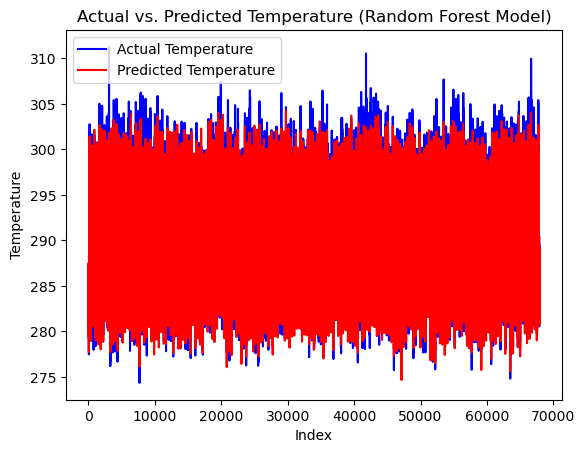

In [31]:
#Random Forest Model: Model 4

#actual temp
plt.plot(y_testdf_4.values, label='Actual Temperature', color='blue')

#predicted temp
plt.plot(predictions_testdf_4, label='Predicted Temperature', color='red')

#plotting
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature (Random Forest Model)')
plt.legend()

# Show plot
plt.show()

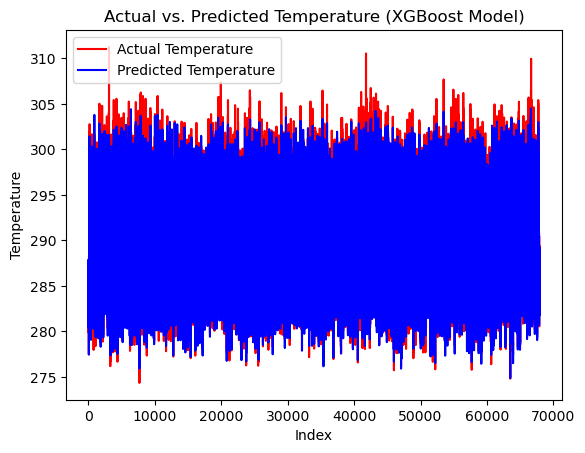

In [32]:
#XGBoost Model: Model 5

# actual temp
plt.plot(y_testdf_4.values, label='Actual Temperature', color='red')

# predicted temperature
plt.plot(predictions_testdf_xgb4, label='Predicted Temperature', color='blue')

# plotting line plot
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature (XGBoost Model)')
plt.legend()

# Show plot
plt.show()

Model 6: Removing PRECT and PRSN, has season_enc

In [33]:
# Assuming X and y are your features and target variable
# Split the data into training and testing sets using train_test_split
X_6 = df_mcr_train_data.drop(columns=['TREFMXAV_U', 'time', 'PRECT', 'PRSN'])
y_6 = df_mcr_train_data['TREFMXAV_U']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_6, y_6, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
rf_model6 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model6.fit(X_train6, y_train6)

# Make predictions on the test data
y_pred6 = rf_model6.predict(X_test6)

# Evaluate the model using Mean Squared Error (MSE)
mse6 = mean_squared_error(y_test6, y_pred6)
print("Mean Squared Error:", mse6)
r_squared6 = rf_model6.score(X_test6, y_test6)
print("R^2 Score:", r_squared6)

X_testdf_6 = df_mcr_test_data.drop(columns=['TREFMXAV_U', 'time', 'PRECT', 'PRSN'])
y_testdf_6 = df_mcr_test_data['TREFMXAV_U']
predictions_testdf_6 = rf_model6.predict(X_testdf_6)
mse_testdf_6 =  mean_squared_error(y_testdf_6, predictions_testdf_6)
print("Mean Squared Error:", mse_testdf_6)
r_squared_testdf_6 = rf_model6.score(X_testdf_6, y_testdf_6)
print("R^2 Score:", r_squared_testdf_6)

Mean Squared Error: 1.1319406710521651
R^2 Score: 0.9550341597147181
Mean Squared Error: 1.545428119071419
R^2 Score: 0.947110334560402


## Project Reflection
Project 2 is about exploring supervised learning and creating a reproducible environment. The EDA that had been conducted in project 1 is aligned with this dataset. Therefore, it enabled to get leads on feature selection. I have added seasons as one of the features, which has improved the metrics slightly. 
Moreover, I have consciously excluded the reference height temperature as one of the features as it would introduce significant bias in the model. This is because it is almost similar to the urban temperature. In addition, the feature importance graph from model 1 and model 4 have aided in finalizing the features. 

An integral element about models are that it requires several model creations and improvising at every step until the metrics do not improve any further. I have tried using 6 models and 2 different learning algorithms. The base model produced metrics, which were reasonably good. However, the best metrics were found using XGBoost in Model 5. The features used were 'FLNS', 'FSNS', 'PRECT','PRSN', 'QBOT', 'UBOT', 'VBOT', 'season_enc', similar to model 4. The mean squared error on the test data was 1.25, which is fairly low and reasonable and the R-squared value was 0.957, which means the dependent variables are able to explain 95.7% of the variance in the urban temperature. The next best model includes model 4 using Random Forest. The features used were the same. The R-squared value equaled to 0.947 and mse to 1.543, which are also fairly reasonable metrics. However, XGBoost algorithm performed better than Random Forest algorithm in this context.

Further, feature Importance for Model 4 has shown that PRECT and PRSN do not much importance. However, removing PRECT and PRSN in model 6 has not improved the metrics.

Additionally, I have tried to explore another model using the whole dataset excluding the test set to train the model, and then predict for Manchester for the given time frame. However, due to limitation in computational power, I have been unable to. Hence, a way forward could be to explore that. Moreover, using grid search and random search for hyper parameter tuning could also improve the metrics further.
